[1.0 8.3; 1.0 8.6; 1.0 8.8; 1.0 10.5; 1.0 10.7; 1.0 10.8; 1.0 11.0; 1.0 11.0; 1.0 11.1; 1.0 11.2; 1.0 11.3; 1.0 11.4; 1.0 11.4; 1.0 11.7; 1.0 12.0; 1.0 12.9; 1.0 12.9; 1.0 13.3; 1.0 13.7; 1.0 13.8; 1.0 14.0; 1.0 14.2; 1.0 14.5; 1.0 16.0; 1.0 16.3; 1.0 17.3; 1.0 17.5; 1.0 17.9; 1.0 18.0; 1.0 18.0; 1.0 20.6]updatex:[-0.5080571630830173, 2.1288285119215566]
iteration 100: step size = 0.0013378550367377784p[-10.924301348373255, -29.668666561856174], x = [-0.4934420315012549, 2.1685208869146297]
updatex:[-1.7816606236485955, 2.2145380439966056]
iteration 200: step size = 0.0013378550367377784p[-10.217437764586244, -25.60979100280176], x = [-1.767991173072689, 2.248800231879506]
updatex:[-2.793690070581817, 2.3032234975936414]
iteration 300: step size = 0.0010033912775533338p[-9.353007735959729, -20.426719474893872], x = [-2.784305344200666, 2.323719489743779]
updatex:[-3.715862870588059, 2.3655129687968683]
iteration 400: step size = 0.0013378550367377784p[-8.35438499177748, -13.09622773174

updatex:[-27.52948582582831, 4.297499230971615]
iteration 4400: step size = 0.0010033912775533338p[-1.9321775790556899, -4.100579846139198], x = [-27.5275470956988, 4.301613717022143]
updatex:[-27.665026895067435, 4.311583514938455]
iteration 4500: step size = 0.0007525434581650003p[-1.7403919819882532, -3.285563428974484], x = [-27.663717174466747, 4.3140560442033165]
updatex:[-27.77006451629674, 4.318346833579179]
iteration 4600: step size = 0.0005644075936237503p[-1.9185371747185584, -6.9711979471504435], x = [-27.768981679346677, 4.322281430637205]
updatex:[-27.86658368368541, 4.326732356309616]
iteration 4700: step size = 0.0007525434581650003p[-1.5790468173697079, -3.9770509075535188], x = [-27.86539538233286, 4.329725259952885]
updatex:[-27.955682627330535, 4.333200799648642]
iteration 4800: step size = 0.0007525434581650003p[-1.5234675171714755, -4.481785616675069], x = [-27.95453615181676, 4.336573538095369]
updatex:[-28.03806678873813, 4.3390692882036905]
iteration 4900: step

updatex:[-29.113965656390242, 4.426869045558481]
iteration 8800: step size = 0.0005644075936237503p[-0.08976290656727315, -0.18883457471000042], x = [-29.11391499352415, 4.426975625226387]
updatex:[-29.11857826124431, 4.4272383814806995]
iteration 8900: step size = 0.0005644075936237503p[-0.0816586693949688, -0.14762449496643626], x = [-29.118532172471216, 4.4273217018666635]
updatex:[-29.122909311583648, 4.427534526414313]
iteration 9000: step size = 0.0007525434581650003p[-0.07454240687289371, -0.1152860207405979], x = [-29.122853215183, 4.427621284155039]
updatex:[-29.126911093096584, 4.427834283286392]
iteration 9100: step size = 0.0005644075936237503p[-0.0733234864325425, -0.1598821147956926], x = [-29.12686970876405, 4.427924521966068]
updatex:[-29.13065403063866, 4.4281351545216605]
iteration 9200: step size = 0.0005644075936237503p[-0.06664374921695071, -0.1250188329815387], x = [-29.130616416400535, 4.428205716100341]
updatex:[-29.134168623578756, 4.428374838622131]
iteration 

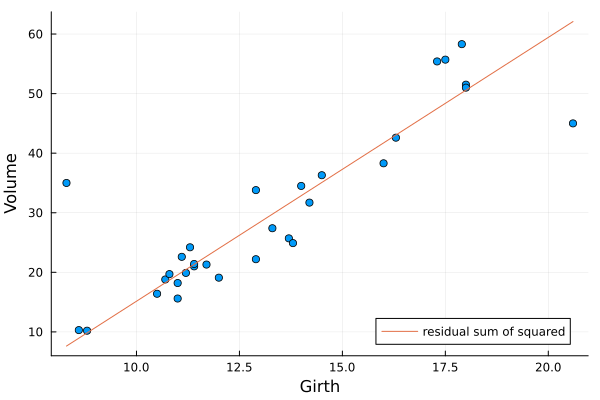

In [2]:
using DataFrames, CSV, LinearAlgebra
using GLM, StatsModels, Plots
using ForwardDiff
# use the data on cherry trees
Trees = CSV.read("/Users/dhondupdolma/Desktop/Data/cherry-trees.csv", DataFrame)
using Symbolics
fo = @formula(Volume ~ 1 + Girth)
A = modelmatrix(fo.rhs, Trees)      # the predictors
print(A)
b = vec(modelmatrix(fo.lhs, Trees)) # the response


function line_search(f, ∇f, x, p)
    α = 1    # initial step length = 1 required for newton-like methods
    rho = 0.75
    c = .01
    while f(x + α*p) > f(x) + c*α*transpose(∇f(x))*p
        # sufficient decrease not met, reduce step size
        α = rho * α
    end
    return α
end

function hub(u; M=1) #takes in a parameter u which is a scalar value supposedly a residual 
    sum =0
    if abs(u) <= M #check whether the absolute value of the residual is less than or equal to M
        return u^2 # square the residual
    else 
        return M*(2*abs(u)-M)
    end
end

function hubsum(x; M=1) #takes in a parameter x which is a vector 
    sum = 0
    for i in 1:31
        checkhub = A[i,:]'*x-b[i] # residual of each data point 
        sum = sum +  hub(checkhub) # pass the residual into the hub function and add the huberdized residual to total sum
         # return the sum of the huberdized residual
    end   
    return sum 
end 

function ∇h(x; M=1)  #gradient of the residual function 
    j = 1
    sum =0
    for k in 1:31 #loop for the gradient with respect to x1
        u = A[k,:]'*x-b[k] #residual of each data point 
        if abs(u) <= M #check whether the absolute value of the residual is less than or equal to 1 
            sum = sum + 2*(A[k,j]*x[1] + A[k,j+1]*x[2] - b[k])*A[k,j]# #gradient of the residual of with respect to x1
        else 
            sum = sum + 2*M*A[k,j]*sign(u) #if abs(u ) > 1 gradient of the residual of with respect to x1
        end
    end
    sum1=0
    y =1
    for t in 1:31 #loop for the gradient with respect to x2
        u1 = A[t,:]'*x-b[t]   #the residual of each data point 
        if abs(u1) <= M #check whether the absolute value of the residual is less than or equal to 1 
            sum1 = sum1 + 2*(A[t,y]*x[1] + A[t,y+1]*x[2] - b[t])*A[t,y+1] #gradient of the residual of with respect to x2
        else 
            sum1 = sum1 + 2*M*A[t,y+1]*sign(u1) #if abs(u ) > 1 gradient of the residual of with respect to x2
        end
    end
    return [sum; sum1] #returns a vector of the gradient  
    
end

function steepest_descent(f, ∇f, x; ϵ=1e-1, k=100)
    i = 1
    α =1   
    while norm(∇f(x)) > ϵ
        # compute the direction
        B = -I       # steepest descent
        p = B * ∇f(x)
        # determine the step size
        α = line_search(f, ∇f, x, p)
        x = x + α*p  # the new iterate

        if i % k == 0
            println("updatex:", x + α*p )
            println("iteration ", i, ": step size = ", α,"p", p ,", x = ", x)
        end
        i += 1
    end
    return x
end


x_ls = steepest_descent(hubsum, ∇h,[1,1])

println(x_ls)
a = A[:,2]

h(x) = x_ls[1]+ x_ls[2]*x  #x is suppose to be the girth 
scatter(a, b, label="", xlabel="Girth", ylabel="Volume") #data points 
plot!(h, label = "residual sum of squared", legend = :bottomright)